# Tensorflow2.0实现单变量线性回归
假设我们要学习的函数为线性函数 y = 2x +1
# 生成数据
### 导入相关库

In [1]:
import matplotlib.pyplot as plt # 载入matplotlib
import numpy as np # 载入numpy
#允许使用TF2执行模式
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()
# 在Jupyter中，使用matplotlib显示图像需要设置为 inline 模式，否则不会现实图像
%matplotlib inline
print("TensorFlow版本是：", tf.__version__)
# 设置随机数种子
np.random.seed(5)

TensorFlow版本是： 1.14.0


# 生成数据
- 首先，生成输入数据。
- 我们需要构造满足这个函数的x和y同时加入一些不满足方程的噪声。

In [2]:
# 直接采用np生成等差数列的方法，生成100个点，每个点的取值在-1~1之间
x_data = np.linspace(-1, 1, 100)

# y = 2x +1 + 噪声， 其中， 噪声的唯度与x_data一致
y_data = 2 * x_data + 1.0 + np.random.randn( * x_data.shape) * 0.4

# 利用matplotlib画图

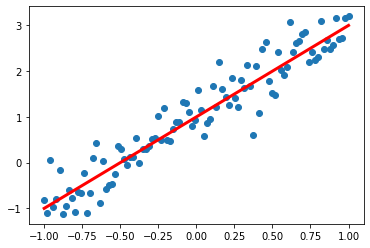

In [3]:
# 画出随机生成数据的散点图
plt.scatter(x_data, y_data)

# 画出通过学习得到的目标线性函数 y = 2x + 1
plt.plot(x_data, 2 * x_data + 1.0, color = 'red', linewidth = 3)

# 构建回归模型

In [4]:
#通过模型执行， 将实现前向计算（预测计算）
def model(x, w, b):
    return tf.multiply(x,w)+b

# 创建变量
- Tensorflow变量的声明函数是tf.Variable
- tf.Variable的作用是保存和更新参数
- 变量的初始值可以是随机数、常数，或是通过其他变量的初始值计算得到

In [5]:
# 构建线性函数的斜率，变量w
w = tf.Variable(np.random.randn(), tf.float32)
# 构建线性函数的截距，变量b
b = tf.Variable(0.0, tf.float32)

# 定义损失函数

In [6]:
# 定义均方差损失函数
def loss(x, y, w, b):
    err = model(x, w, b) - y #计算模型预测值和标签的差异
    squared_err = tf.square(err) #求平方， 得出方差
    return tf.reduce_mean(squared_err) #求均值，得出均方差

# 设置训练超参数

In [7]:
training_epochs = 10 # 迭代次数（训练轮数）
learning_rate = 0.01 # 学习率

# 定义计算梯度函数

In [8]:
# 计算样本数据[x,y]在参数[w,b]点上的梯度
def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)
        return tape.gradient(loss_, [w,b]) #返回梯度向量

# 执行训练

Training Epoch:  1 Step: 100 loss=0.877006
Training Epoch:  2 Step: 200 loss=0.258763
Training Epoch:  3 Step: 300 loss=0.115142
Training Epoch:  4 Step: 400 loss=0.067318
Training Epoch:  5 Step: 500 loss=0.048247
Training Epoch:  6 Step: 600 loss=0.039808
Training Epoch:  7 Step: 700 loss=0.035832
Training Epoch:  8 Step: 800 loss=0.033891
Training Epoch:  9 Step: 900 loss=0.032925
Training Epoch: 10 Step:1000 loss=0.032439


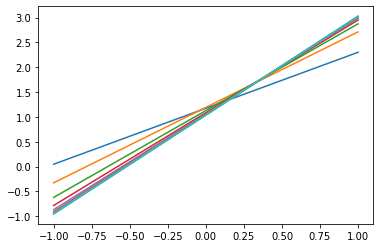

In [9]:
step = 0
loss_list = []
display_step = 10

for epoch in range(training_epochs):
    for xs, ys in zip(x_data, y_data):
        loss_ = loss(xs, ys, w, b)
        loss_list.append(loss_)
        
        delta_w, delta_b = grad(xs, ys, w, b)
        change_w = delta_w * learning_rate
        change_b = delta_b * learning_rate
        w.assign_sub(change_w)
        b.assign_sub(change_b)
        
        step = step + 1
    if step % display_step == 0:
        print("Training Epoch:", '%2d' % (epoch+1), "Step:%4d" % (step),"loss=%6f" % (loss_))
    plt.plot(x_data, w.numpy()*x_data+b.numpy())

In [10]:
print("w:", w.numpy())
print("b:", b.numpy())

w: 1.99055
b: 1.0367402


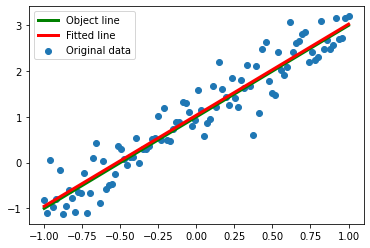

In [11]:
plt.scatter(x_data, y_data, label = 'Original data')
plt.plot(x_data, x_data * 2.0 + 1.0, label = 'Object line', color = 'g', linewidth = 3)
plt.plot(x_data, x_data * w.numpy() + b.numpy(), label = 'Fitted line', color = 'r', linewidth = 3)
plt.legend(loc = 2) # 通过参数loc指定图例位置

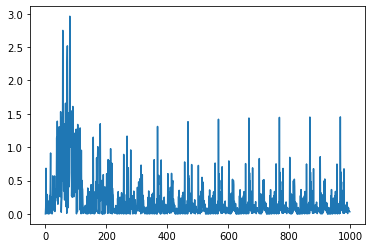

In [12]:
plt.plot(loss_list)

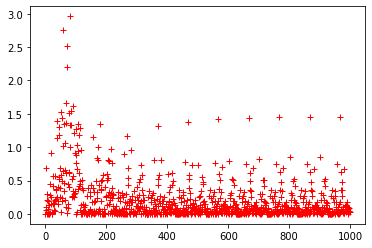

In [13]:
plt.plot(loss_list,'r+')

In [14]:
x_test = 3.21
predict = model(x_test, w.numpy(), b.numpy())
print("预测值:%f" % predict)

target = 2 * x_test + 1.0
print("目标值:%f" % target)

预测值:7.426406
目标值:7.420000
